# Research Notebook
## Kelly Hayes
## Date: February 17, 2025

# 1: Experience
## Describe at least one research activity you worked on this week. 

In the past two weeks, we were instructed to look through two resources. The first of which was a presentation titled "The splashback radius as a physical halo boundary", Benedikt Diemer [1](https://www.kicc.cam.ac.uk/system/files/documents/presentation_kicc_diemer.pdf). In this presentation, we looked through the graphs provided, specifically, we wanted to look at the graph on page 13. This graph compares peak height with splashback radius for several observations and two different simulations (More+15 and Diemer+17). The second resource was a paper "AMICO galaxy clusters in KiDS-DR3: Measuring the splashback radius from weak gravitational lensing", Carlo Giocoli et al [2]. We specifically examined figure 9, which, like the Diemer example, showed splashback radius as a function of cluster peak height and fitted the More and Diemer simulations to the observations collected from various other authors. As a collective, students in my group worked to locate the resources found in these graphs. 

## Motivation:

The final goal was to reproduce figure 9 in the KiDS paper. In general, we want to compare theoretical models of data with simulations and understand the fit and potential discrepancies.

# 2: What? (What happened?)
## Describe what happened during your activities for the week.

In examining the figures provided by the authors and the figures produced in the previous week, I gained a better understanding of the discrepancies between different simulation models and observational data used. While I was struggling to reproduce the observational results, I was able to somewhat reproduce the simulation data as follows:

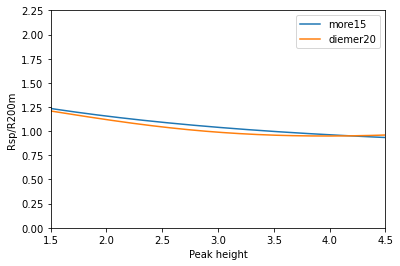

In [5]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from colossus.cosmology import cosmology
cosmology.setCosmology('planck18');
from colossus.halo import splashback
from colossus.lss import peaks

z = 0.0
M200m = 1E12
nu200m = peaks.peakHeight(M200m, z)
Gamma = np.arange(0.0, 5.1, 0.1)

nu200m = np.arange(1, 5, 0.01)

plt.figure()
plt.xlabel('Peak height')
plt.ylabel('Rsp/R200m')
plt.xlim(1.5, 4.5)  # Set x-axis limits
plt.ylim(0, 2.25)   # Set y-axis limits

for model_name in splashback.models:
    if model_name == "more15" or model_name == "diemer20":
        RspR200m, mask = splashback.splashbackModel('RspR200m', nu200m = nu200m, z = z, 
                                    model = model_name, rspdef = 'sp-apr-p75', statistic = 'median')
        plt.plot(nu200m[mask], RspR200m, label = model_name.replace('_', '\_'))
plt.legend();


Although this graph is similar to the KiDS figure, it is clear I still have work to do to fix the "crossover" of data at around x = 4.3, and modify the scaling to match the figure better, in addition to adding the observational data.

# 3: So what? (What does it mean?)
## Describe your results

This means that we still have work to do to explain the discrepancy between theoretical models by More et al. and Diemer and the observational data collected by other authors. It is also important to mention that we have not yet made the jump of generalizing this data so we can use it for cold and fuzzy dark matter splashback radii, which is our goal.

# 4. Now what? (What's next?)
## Plan for the next week

My plan is to figure out how to add the observational data to my plot given the data provided by my peers. In addition, I plan to attempt to explain the potential discrepancies between the simulations and the observational data. To make the jump towards other models of dark matter, such as fuzzy dark matter and self interacting dark matter, I will use COLOSSUS and attempt to generalize the semi-analytical model by Adhikari et al. provided in the team google document. I will then compare my predictions with the aforementioned data.

# 5. Bibliography

[1] B. Diemer, The splashback radius as a physical halo boundary, https://www.kicc.cam.ac.uk/system/files/documents/presentation_kicc_diemer.pdf (accessed Feb. 17, 2025). 

[2] C. Giocoli et al., “Amico galaxy clusters in kids-DR3: Measuring the splashback radius from weak gravitational lensing,” Astronomy &amp; Astrophysics, vol. 687, Jun. 2024. doi:10.1051/0004-6361/202449561 